In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

#drop one duplicate record with same city name, same ride_ids but different # of drivers

city_df = city_df.drop_duplicates('city', keep = 'first')

#merge
merged_df = city_df.merge(ride_df, on = 'city')

merged_df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

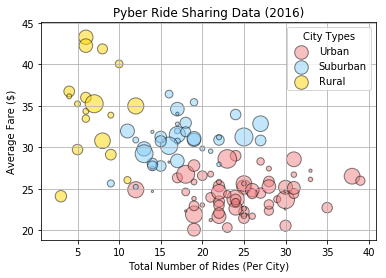

<Figure size 432x288 with 0 Axes>

In [2]:

#Average Fare Per City
average_fare = merged_df.groupby("city")["fare"].mean()
average_fare = pd.DataFrame(average_fare).reset_index()
average_fare = average_fare.rename(columns = {'fare': 'avg_fare'})

#Total Number of Rides Per City
total_rides = merged_df.groupby("city")["ride_id"].count()
total_rides = pd.DataFrame(total_rides).reset_index()
total_rides = total_rides.rename(columns = {'ride_id': 'total_rides'})
#Total Drivers
total_drivers = merged_df[["city", "driver_count"]].drop_duplicates("city")
#City Type
city_type = merged_df[["city", "type"]].drop_duplicates("city")
merged = pd.merge(pd.merge(pd.merge(average_fare, total_rides, on="city"), 
                             total_drivers, on="city"), city_type, on="city")

urban_group = merged.loc[merged['type'] == 'Urban']
suburban_group = merged.loc[merged['type'] == 'Suburban']
rural_group = merged.loc[merged['type'] == 'Rural']

ax1 = urban_group.plot(kind='scatter',x='total_rides', y='avg_fare',
                       color='lightcoral', s=merged['driver_count']*5, label = 'Urban', 
                       alpha = 0.5, edgecolor = "black", linewidths = 1)    
ax2 = suburban_group.plot(kind='scatter', x='total_rides', y='avg_fare', 
                          color='lightskyblue',s=merged['driver_count']*5, label = 'Suburban', 
                          alpha = 0.5, edgecolor = "black", linewidths = 1, ax=ax1)    
ax3 = rural_group.plot(kind='scatter', x='total_rides', y='avg_fare', 
                       color='gold', s=merged['driver_count']*5, label = 'Rural', 
                       alpha = 0.5, edgecolor = "black", linewidths = 1, ax=ax1)

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend(title = 'City Types')
plt.grid(True)


# Show plot
plt.show()
plt.savefig("../images/PyberRideSharingData")


## Total Fares by City Type

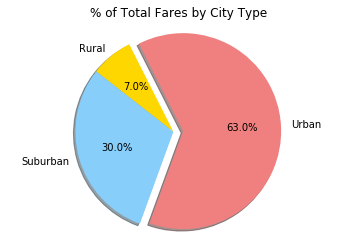

<Figure size 432x288 with 0 Axes>

In [3]:
#Percent of Total Fares by City Type
total_fares = merged_df["fare"].sum()
urban_fare = merged_df.loc[merged_df["type"] == "Urban", "fare"].sum()
rural_fare = merged_df.loc[merged_df["type"] == "Rural", "fare"].sum()
suburban_fare = merged_df.loc[merged_df["type"] == "Suburban", "fare"].sum()
urban_fare_p = round(urban_fare/total_fares, 2) *100
rural_fare_p = round(rural_fare/total_fares, 2) *100
suburban_fare_p = round(suburban_fare/total_fares, 2) *100

# Pie chart
labels = 'Urban', 'Rural', 'Suburban'
sizes = [urban_fare_p, rural_fare_p, suburban_fare_p]
explode = (0.1, 0, 0)  


fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=250, colors = ["lightcoral", "gold", "lightskyblue"])

ax1.axis('equal')

plt.title("% of Total Fares by City Type")

plt.show()
plt.savefig("../images/%oftotalfaresbycitytype")

## Total Rides by City Type

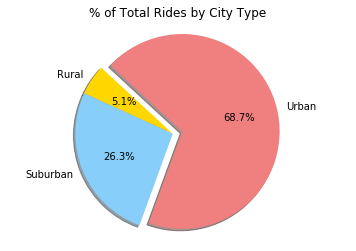

<Figure size 432x288 with 0 Axes>

In [4]:

final_total_rides = len(merged_df)
urban_rides = round(merged_df.loc[merged_df["type"] == "Urban", "ride_id"].count()/final_total_rides, 2) * 100
rural_rides = round(merged_df.loc[merged_df["type"] == "Rural", "ride_id"].count()/final_total_rides, 2) * 100
suburban_rides = round(merged_df.loc[merged_df["type"] == "Suburban", "ride_id"].count()/final_total_rides, 2) * 100


labels = 'Urban', 'Rural', 'Suburban'
sizes = [urban_rides, rural_rides, suburban_rides]
explode = (0.1, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=250, colors = ["lightcoral", "gold", "lightskyblue"])

ax1.axis('equal')

plt.title("% of Total Rides by City Type")

plt.show()
plt.savefig("../images/%oftotalridesbycitytype")

## Total Drivers by City Type

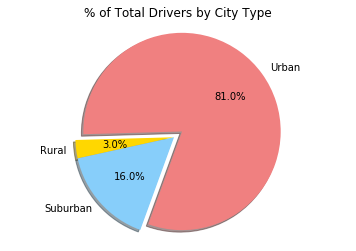

<Figure size 432x288 with 0 Axes>

In [5]:
#Percent of Total Drivers by City Type
final_total_drivers = merged["driver_count"].sum()
urban_drivers = round(merged.loc[merged["type"] == "Urban", "driver_count"].sum()/final_total_drivers, 2)* 100
rural_drivers = round(merged.loc[merged["type"] == "Rural", "driver_count"].sum()/final_total_drivers, 2)* 100
suburban_drivers = round(merged.loc[merged["type"] == "Suburban", "driver_count"].sum()/final_total_drivers, 2)* 100

labels = 'Urban', 'Rural', 'Suburban'
sizes = [urban_drivers, rural_drivers, suburban_drivers]
explode = (0.1, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=250, colors = ["lightcoral", "gold", "lightskyblue"])
ax1.axis('equal') 

plt.title("% of Total Drivers by City Type")

plt.show()

plt.savefig("../images/%oftotaldriversbycitytype")